# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [77]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
df

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy
...,...,...,...,...
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl


Questions

In [3]:
df.shape

(258000, 4)

1. Delete unnamed columns

In [4]:
df.drop(['year','percent'],axis = 1,inplace=True)

2. Show the distribution of male and female

In [5]:
df['sex'].hist()

In [6]:
df.groupby('sex',axis=0,).count()

,name
sex,
boy,129000
girl,129000


3. Show the top 5 most preferred names

In [7]:
df['name'].value_counts()[:5]

Jessie       258
Leslie       247
Guadalupe    244
Jean         244
Lee          240
Name: name, dtype: int64

4. What is the median name occurence in the dataset

In [8]:
a= (df.count()/2)
a

name    129000.0
sex     129000.0
dtype: float64

In [9]:
df.iloc[a]

,name,sex
129000,Mary,girl
129000,Mary,girl


5. Distribution of male and female born count by states

In [80]:
new_df = pd.Categorical(df['sex'],ordered = True)
new_df = new_df.rename_categories(['male','female'])
new_df

[male, male, male, male, male, ..., female, female, female, female, female]
Length: 258000
Categories (2, object): [male < female]

In [15]:
new_df.describe()

,counts,freqs
categories,,
male,129000,0.5
female,129000,0.5


In [87]:
import seaborn as sns
nd = pd.DataFrame(new_df)
a = df['name']
a

0             John
1          William
2            James
3          Charles
4           George
            ...   
257995    Carleigh
257996       Iyana
257997      Kenley
257998      Sloane
257999     Elianna
Name: name, Length: 258000, dtype: object

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


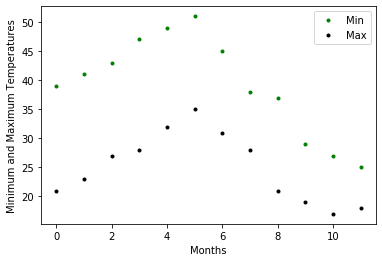

In [72]:
import numpy as np
import matplotlib.pyplot as plt
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.arange(12)

plt.plot(month,Max,'g.')
plt.plot(month,Min,'k.')
plt.xlabel('Months')
plt.ylabel('Minimum and Maximum Temperatures')
plt.legend(['Min','Max'])


In [73]:
from scipy import optimize
def city_temp(times,avg,ampl,time_offset):
    return (avg+ampl *np.cos((times+time_offset)*2*np.pi/times.max()))
res_max,cov_max = optimize.curve_fit(city_temp,month,Max,[20,10,0])
res_min, cov_min = optimize.curve_fit(city_temp,month,Min,[-40,20,0])

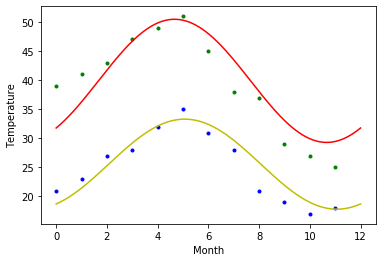

In [76]:
days = np.linspace(0,12,num=365)

plt.figure()
plt.plot(month,Max,'g.')
plt.plot(days,city_temp(days,*res_max),'r-')
plt.plot(month,Min,'b.')
plt.plot(days,city_temp(days,*res_min),'y-')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()